# Midterm Project

For the midterm project you'll get to practice the data science process by trying out a regression problem! You'll then get to compare your model performance to other peers' work on the same dataset as well as work on several other datasets. This will allow you to see new ideas on the same problem as well as nuances of the same technique across different datasets. 

# Datasets

You will take one of the following datasets and apply a standard data science process of exploratory analysis, cleaning and machine learning. This process will be outlined in several large stages. To start, take your dataset, import the data and begin doing some initial exploratory analysis using the tools and techniques we have covered thus far. You will find all three datasets under a folder titled 'Datasets'.


* Walmart Sales Forecasting
* Estimating NYC Cab Trip Duration
* Lego Sets (previously seen)

## Project Outline
* Load Data
* Exploratory Analysis
* Initial Model
* Evaluation
* Feature Engineering
* Model 2
* Evaluation
* Further Investigation/Exploration

# Load the Data

In [1]:
#Your code here
import pandas as pd
import numpy as np
print("Pandas version: "+ pd.__version__)

data = pd.read_csv("Datasets/NYC_Cab_Duration.csv", index_col=0)

Pandas version: 0.19.2


# Exploratory Data Analysis

In [2]:
# Preivew dataset
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170
1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808
358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787
1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679
110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791


In [3]:
# Pandas documentation: https://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.to_datetime.html?highlight=datetime#pandas.to_datetime

# Convert pickup_datetime and dropoff_datetime to datetime object
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime, format = '%Y-%m-%d %H:%M:%S')
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime, format = '%Y-%m-%d %H:%M:%S')

data['vendor_id'] = data['vendor_id'].astype(object)

In [4]:
print("Rows / Columns: ", data.shape)

Rows / Columns:  (583458, 11)


In [5]:
#Easier to read pandas numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format 

# Show quick description of the dataset
data.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,583458,583458.00,583458,583458,583458.00,583458.00,583458.00,583458.00,583458.00,583458,583458.00
unique,583458,2.00,570544,570564,nan,nan,nan,nan,nan,2,nan
top,id3898669,2.00,2016-02-12 20:29:36,2016-05-01 11:26:45,nan,nan,nan,nan,nan,N,nan
freq,1,312326.00,4,4,nan,nan,nan,nan,nan,580186,nan
first,NaN,nan,2016-01-01 00:01:14,2016-01-01 00:03:31,nan,nan,nan,nan,nan,NaN,nan
last,NaN,nan,2016-06-30 23:58:25,2016-07-01 13:26:40,nan,nan,nan,nan,nan,NaN,nan
mean,NaN,nan,NaN,NaN,1.67,-73.97,40.75,-73.97,40.75,NaN,962.29
std,NaN,nan,NaN,NaN,1.32,0.10,0.03,0.10,0.04,NaN,6151.28
min,NaN,nan,NaN,NaN,0.00,-121.93,34.36,-121.93,34.36,NaN,1.00
25%,NaN,nan,NaN,NaN,1.00,-73.99,40.74,-73.99,40.74,NaN,396.00


**Observations**

 - Trip duration: There is a minimum of 1 second in the dataset. There needs to be more investigation of these records.
 - Trip duration: At least on trip lasted over 350,000 seconds  There needs to be more investigation of higher range records.
 
 - Pickup datetime / Dropoff datetime: The data covers the first 6-7 months of 2016.
 - ID: The ids are unique to each record: count and unique-ness are the same. idsshould not be used in modeling.
 - Vendor ID: Are either 1 or 2. Seen in the data preview and there are 2 unique values.
 
 - The "count" for all attributes are the same, so there is no clear missing data in this dataset at first glance.
 
 - Passenger count: Maximum is 9. It is more common to have 1 passenger as seen in the 25% ans 50% quantiles.
 - Passenger count: Minimum is 0. This does not make sense and can be outliers to be deleted.
 
 - The latitude and longitude should be further investigated check maximum and minimums.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
print("Seaborn version: " + sns.__version__)

Seaborn version: 0.7.1


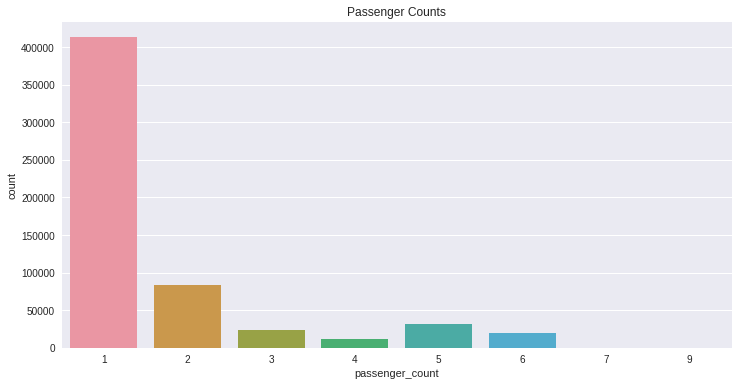

In [7]:
# Investigate passenger counts

# ELIMINATE OUTLIERS
data = data[ data['passenger_count'] >=1 ]

plt.figure(figsize=(12,6))
plt.title("Passenger Counts")
ax = sns.countplot(x = 'passenger_count', data = data )

**Observations**
 - Passenger counts: Most rides tend to have 1 passenger.

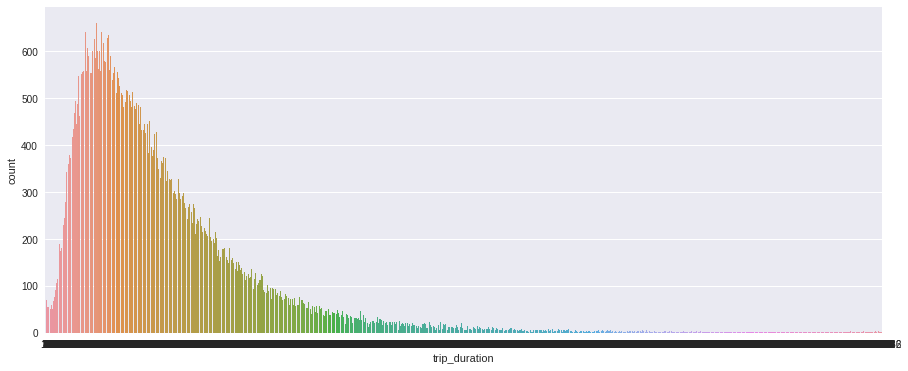

In [9]:
# Investigate trip duration - too many trip_duration values

plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'trip_duration', data = data)

In [8]:
data['trip_duration'].value_counts().sort_index()

1            9
2           75
3          138
4          136
5          121
6           66
7           85
8           77
9           87
10          63
11          70
12          56
13          65
14          77
15          68
16          53
17          62
18          56
19          64
20          51
21          49
22          43
23          58
24          56
25          54
26          47
27          48
28          53
29          55
30          54
          ... 
86341        2
86342        2
86343        2
86344        4
86345        3
86346        4
86348        1
86349        1
86350        1
86351        1
86352        1
86353        2
86354        1
86355        1
86356        1
86357        1
86358        1
86360        1
86361        1
86362        3
86365        1
86366        1
86367        1
86369        1
86377        2
86379        1
86391        1
86392        1
1939736      1
3526282      1
Name: trip_duration, dtype: int64

In [9]:
# Check pickup_longitude, pickup_latitude vs. dropoff_longitude, dropoff_latitude
## There are cases in which locations changed past 1 minute
data[data['trip_duration']==60].head(20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1222838,id0085113,2,2016-05-22 08:19:50,2016-05-22 08:20:50,1,-73.79,40.64,-73.79,40.64,N,60
504157,id0078682,2,2016-03-16 13:41:09,2016-03-16 13:42:09,1,-73.96,40.80,-73.96,40.80,N,60
9943,id3819108,1,2016-06-08 12:06:42,2016-06-08 12:07:42,1,-73.87,40.77,-73.87,40.77,N,60
1071181,id1258199,2,2016-02-20 09:29:09,2016-02-20 09:30:09,2,-73.99,40.77,-73.99,40.77,N,60
704907,id2948189,2,2016-03-29 19:26:25,2016-03-29 19:27:25,6,-73.96,40.78,-73.96,40.77,N,60
1394080,id0725926,1,2016-01-21 05:53:33,2016-01-21 05:54:33,1,-73.98,40.76,-73.98,40.76,N,60
764540,id3675122,1,2016-03-29 17:12:15,2016-03-29 17:13:15,1,-73.98,40.78,-73.98,40.77,N,60
1420927,id0092050,1,2016-04-20 05:48:43,2016-04-20 05:49:43,1,-73.95,40.78,-73.94,40.79,N,60
342506,id0516289,2,2016-05-12 22:34:39,2016-05-12 22:35:39,5,-73.99,40.75,-73.99,40.75,N,60
417141,id2264192,2,2016-04-04 15:47:01,2016-04-04 15:48:01,5,-74.00,40.73,-74.00,40.73,N,60


In [10]:
# ELIMINATE OUTLIERS - Any records under >= 61 seconds
data = data[ data['trip_duration'] >=61]

In [11]:
# Top 50 highest trip duration
data['trip_duration'].sort_values(ascending = False)[0:20]

# Observation: A few very high values.

978383     3526282
355003     1939736
1234291      86392
295382       86391
753765       86379
1138915      86377
66346        86377
1269316      86369
1233528      86367
483960       86366
1282413      86365
556468       86362
1258361      86362
755015       86362
1182032      86361
318008       86360
351537       86358
612768       86357
645313       86356
1107580      86355
Name: trip_duration, dtype: int64

In [12]:
print("In hours: "+ str(3526282/60/60) + "-- not reasonable values")
print("In hours: "+ str(86392/60/60)+ " -- more reasonable?")

In hours: 979.5227777777778-- not reasonable values
In hours: 23.997777777777777 -- more reasonable?


In [13]:
# Check exact data -- pickup_longitude, pickup_latitude vs. dropoff_longitude, dropoff_latitude
## Did pickup and dropoff locations change? Yes, so keep these records.
data[ (data['trip_duration'] <=86392) &
    (data['trip_duration'] >=40000)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
304638,id2336928,2,2016-05-05 11:57:33,2016-05-06 11:46:47,1,-73.97,40.75,-73.95,40.77,N,85754
1345729,id3195819,2,2016-04-22 21:28:13,2016-04-23 21:05:07,6,-73.98,40.75,-73.99,40.75,N,85014
725322,id0452625,2,2016-02-14 15:17:53,2016-02-15 15:17:05,1,-73.99,40.72,-73.99,40.76,N,86352
412504,id2109369,2,2016-04-30 03:40:13,2016-05-01 03:15:04,1,-74.00,40.74,-73.99,40.75,N,84891
1127725,id1377858,2,2016-04-02 21:11:32,2016-04-03 20:57:33,1,-73.99,40.74,-73.99,40.74,N,85561
1024017,id2187835,2,2016-06-28 18:45:22,2016-06-29 18:39:53,5,-73.98,40.74,-73.99,40.72,N,86071
1036503,id2086897,2,2016-01-15 14:40:50,2016-01-16 14:29:36,3,-73.99,40.75,-73.98,40.76,N,85726
676625,id3345808,2,2016-06-12 00:24:32,2016-06-13 00:19:33,1,-73.99,40.72,-73.95,40.78,N,86101
53235,id3491590,2,2016-02-04 06:39:19,2016-02-05 00:00:00,1,-73.96,40.76,-73.98,40.75,N,62441
978958,id0792001,2,2016-05-09 19:42:22,2016-05-10 19:28:37,1,-73.97,40.76,-73.97,40.76,N,85575


In [15]:
data['trip_duration_min'] = data['trip_duration']/60
data['trip_duration_hr'] = data['trip_duration']/60/60

In [16]:
# Check hour durations to check -- pickup_longitude, pickup_latitude vs. dropoff_longitude, dropoff_latitude
data['trip_duration_hr_round'] = round(data['trip_duration_hr'], 0)

In [16]:
data['trip_duration_hr_round'].value_counts().sort_index()

0.00      534759
1.00       43831
2.00         387
3.00          25
4.00           9
5.00           2
6.00           5
7.00           6
8.00           6
9.00           3
10.00          6
11.00          3
12.00          5
13.00          2
14.00          4
15.00          7
16.00          1
17.00          6
18.00          3
19.00          5
20.00          2
21.00          8
22.00         11
23.00        111
24.00        640
539.00         1
980.00         1
Name: trip_duration_hr_round, dtype: int64

In [17]:
# Check exact data -- pickup_longitude, pickup_latitude vs. dropoff_longitude, dropoff_latitude
## Did pickup and dropoff locations change? Yes. 
data[ (data['trip_duration_hr_round'] <=17.00) &
    (data['trip_duration_hr_round'] >=14.00)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_min,trip_duration_hr,trip_duration_hr_round
53235,id3491590,2,2016-02-04 06:39:19,2016-02-05 00:00:00,1,-73.96,40.76,-73.98,40.75,N,62441,1040.68,17.34,17.00
1022724,id1958739,2,2016-01-22 08:32:16,2016-01-23 00:00:00,2,-73.99,40.72,-74.00,40.71,N,55664,927.73,15.46,15.00
591284,id3079958,2,2016-01-06 07:13:34,2016-01-07 00:00:00,1,-74.00,40.74,-74.00,40.73,N,60386,1006.43,16.77,17.00
629692,id2903714,2,2016-01-13 07:29:02,2016-01-14 00:00:00,6,-73.99,40.73,-73.97,40.75,N,59458,990.97,16.52,17.00
982734,id2601927,2,2016-04-04 09:06:25,2016-04-05 00:00:00,1,-73.86,40.77,-74.01,40.71,N,53615,893.58,14.89,15.00
989410,id1236461,2,2016-03-13 09:30:57,2016-03-14 00:00:00,1,-73.99,40.74,-74.00,40.75,N,52143,869.05,14.48,14.00
91585,id0999654,2,2016-03-30 09:39:51,2016-03-31 00:00:00,1,-74.00,40.76,-73.99,40.77,N,51609,860.15,14.34,14.00
1218724,id3521903,2,2016-01-14 10:25:45,2016-01-15 00:00:00,1,-73.98,40.74,-73.98,40.73,N,48855,814.25,13.57,14.00
335406,id2224833,1,2016-04-06 21:02:42,2016-04-07 11:35:38,1,-73.78,40.65,-73.79,40.70,N,52376,872.93,14.55,15.00
1282974,id2297034,2,2016-06-22 06:39:24,2016-06-23 00:00:00,1,-73.98,40.75,-73.99,40.69,N,62436,1040.60,17.34,17.00


In [8]:
# ELIMINATE OUTLIERS - Remove the two highest 
data = data[ data['trip_duration'] <=86392]

In [ ]:
# Investigate dates - ranges

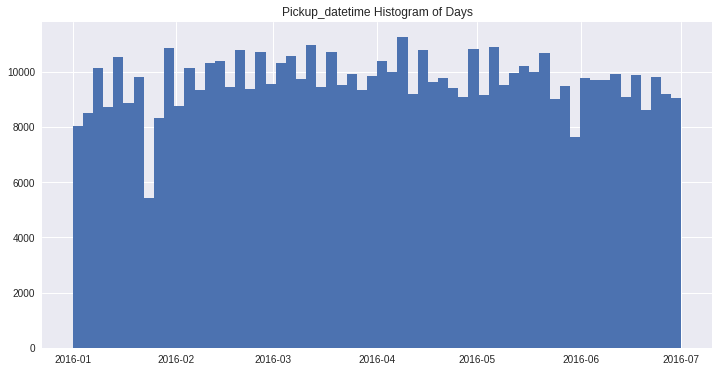

In [23]:
# Doc: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
data['pickup_datetime'].hist(bins=60, figsize = (12,6))
plt.title("Pickup_datetime Histogram of Days")

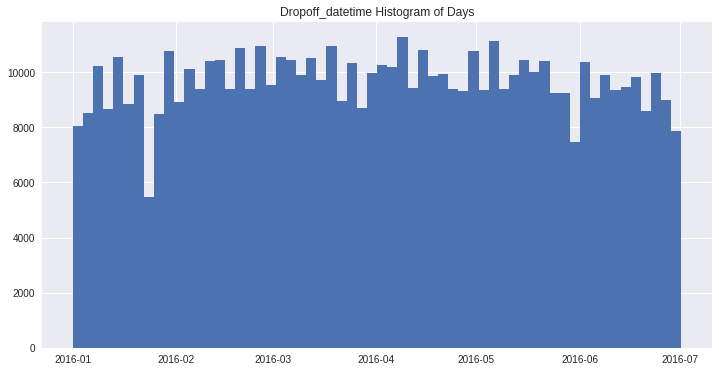

In [25]:
data['dropoff_datetime'].hist(bins=60,figsize = (12,6))
plt.title("Dropoff_datetime Histogram of Days")

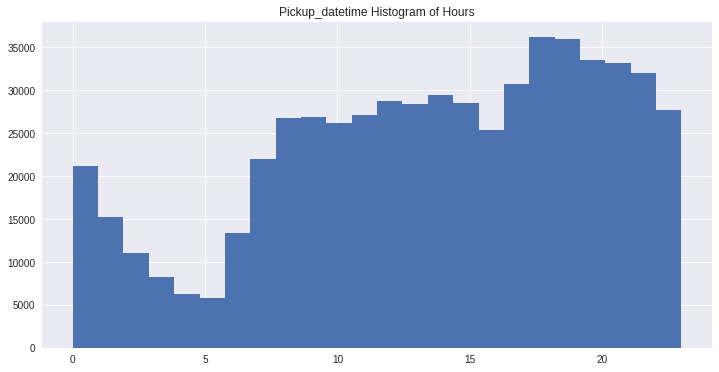

In [24]:
# Doc: https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dt-accessors
data['pickup_datetime'].dt.hour.hist(bins=24,figsize = (12,6))
plt.title("Pickup_datetime Histogram of Hours")

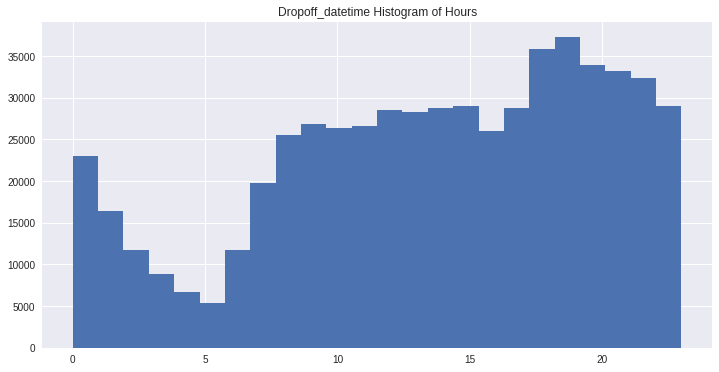

In [26]:
data['dropoff_datetime'].dt.hour.hist(bins=24,figsize = (12,6))
plt.title("Dropoff_datetime Histogram of Hours")

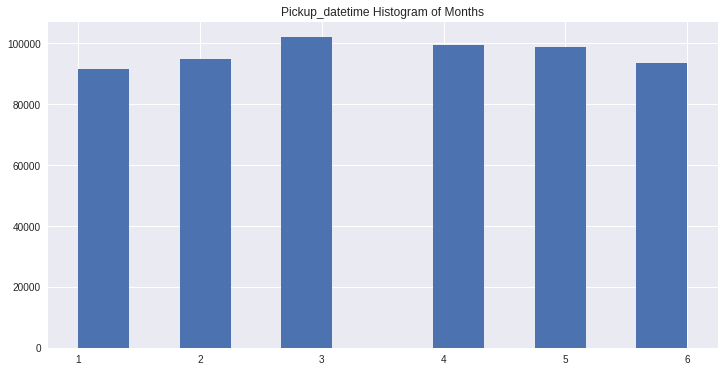

In [21]:
data['pickup_datetime'].dt.month.hist(bins= 12,figsize = (12,6))
plt.title("Pickup_datetime Histogram of Months")

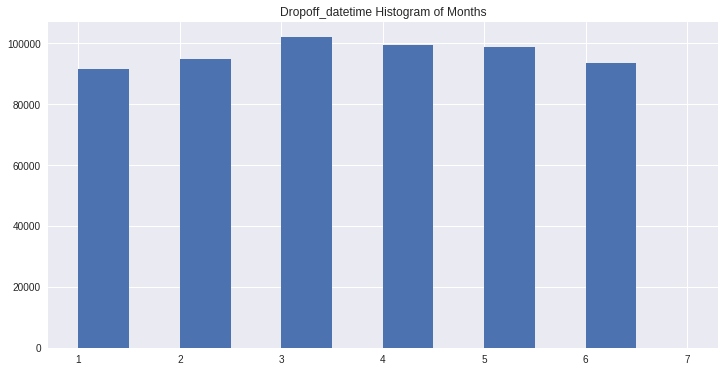

In [20]:
data['dropoff_datetime'].dt.month.hist(bins= 12,figsize = (12,6))
plt.title("Dropoff_datetime Histogram of Months")

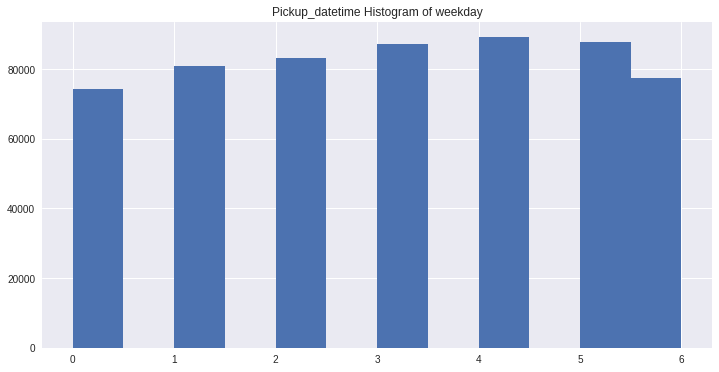

In [95]:
# Doc: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.weekday.html

## Monday=0, Sunday=6
data['pickup_datetime'].dt.weekday.hist(bins= 12,figsize = (12,6))
plt.title("Pickup_datetime Histogram of weekday")

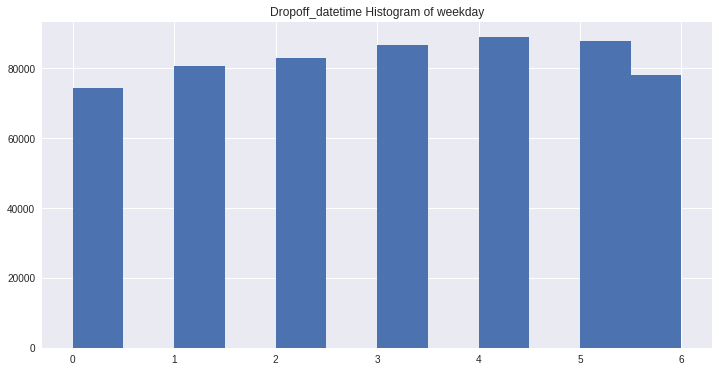

In [19]:
data['dropoff_datetime'].dt.weekday.hist(bins= 12,figsize = (12,6))
plt.title("Dropoff_datetime Histogram of weekday")

**Observations**
 - Pickup and dropoff ride counts tend to be lowest during the hour range between 1:00 and 6:00.
 - Pickup and dropoff ride counts tend to be highest during the evening hours closer to 20:00 and 24:00. 
 - Pickup and dropoff ride counts tend to be similar across months.

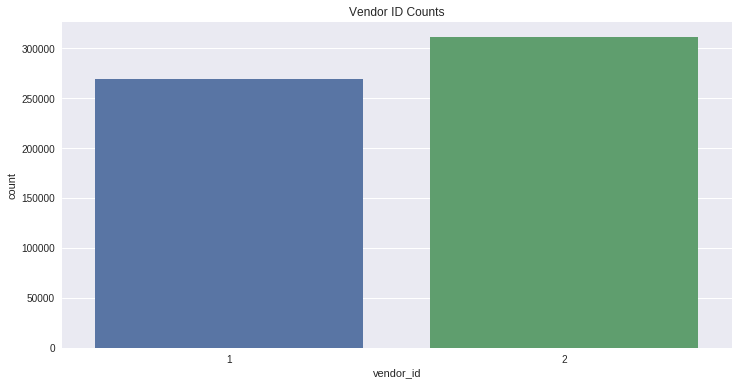

In [22]:
# Investigate number of vendors
# Doc: https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(12,6))
plt.title("Vendor ID Counts")
sns.countplot(x = 'vendor_id', data = data )

**Observations**
 - Fairly even counts between vendor ids

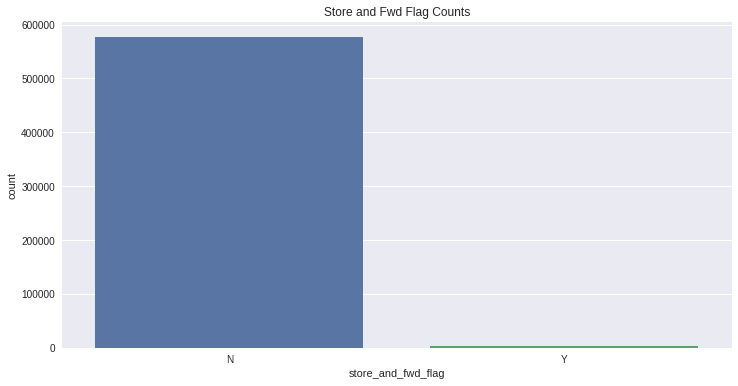

In [23]:
# Investigate store_and_fwd_flag
plt.figure(figsize=(12,6))
plt.title("Store and Fwd Flag Counts")
sns.countplot(x = 'store_and_fwd_flag', data = data )

**Observations**
 - This variable skews towards N

In [ ]:
# Investigate pickup and dropoff long/lats

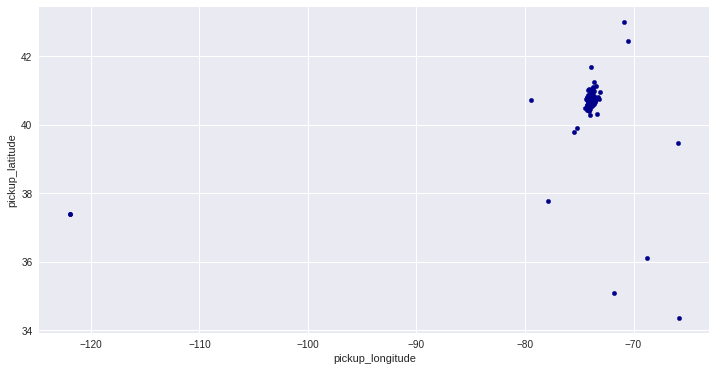

In [35]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html
data.plot.scatter(x = 'pickup_longitude',
                 y = 'pickup_latitude',
                 c = 'DarkBlue',
                 figsize = (12,6))


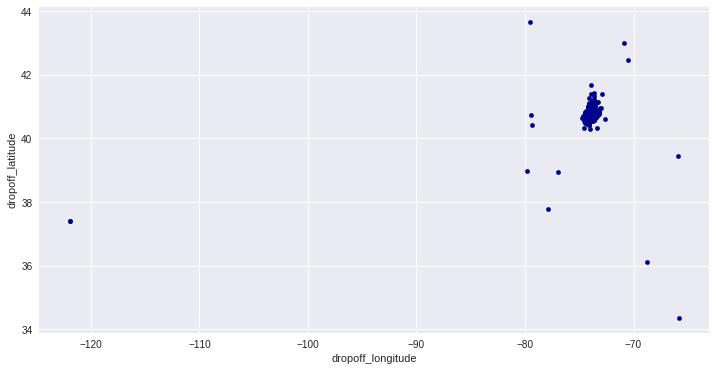

In [38]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html
data.plot.scatter(x = 'dropoff_longitude',
                 y = 'dropoff_latitude',
                 c = 'DarkBlue', figsize = (12,6))

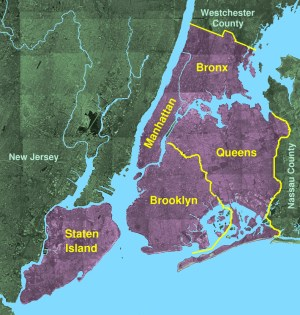

In [39]:
# A lot is concentrated in the manhattan area
from IPython.display import Image
from IPython.core.display import HTML 

# https://upload.wikimedia.org/wikipedia/commons/3/33/Usgs_photo_New_York_five_boroughs.jpg
Image(filename='Usgs_photo_New_York_five_boroughs.jpg',
     width = 650,
     height = 500)

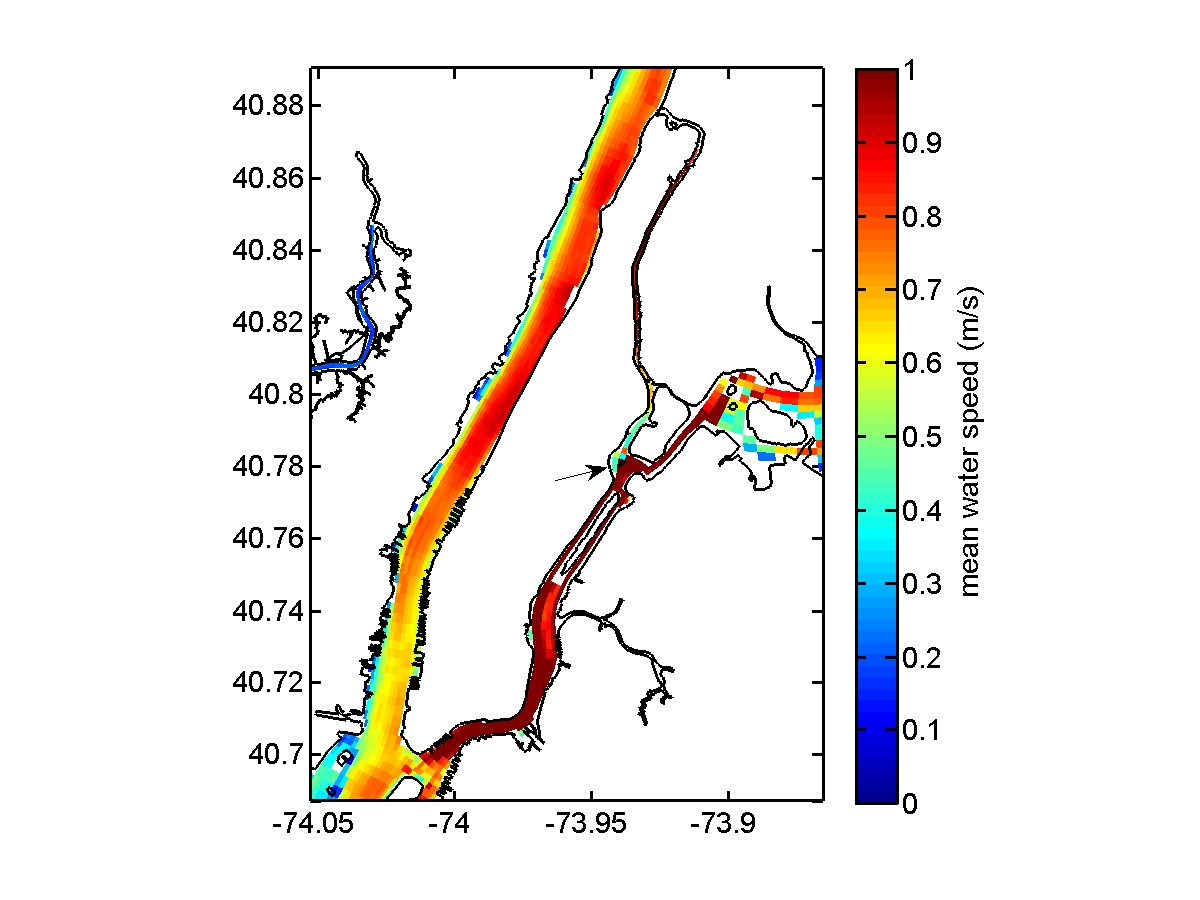

In [40]:
# Image source: 
#  https://seaandskyny.files.wordpress.com/2012/03/meanvel1_tidal_manhattano.jpg
Image(filename='meanvel1_tidal_manhattano.jpg',
     width = 650,
     height = 500)

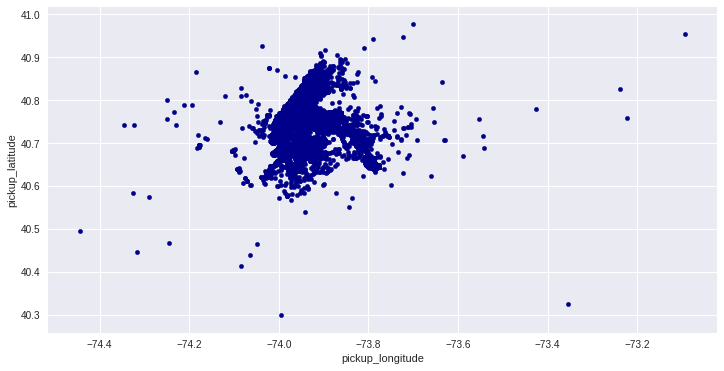

In [41]:
# Remove outlier from plot
data[(data['pickup_longitude'] > -74.5) & 
     (data['pickup_longitude'] < -73) & 
     (data['pickup_latitude'] > 39) &
    (data['pickup_latitude'] < 41) 
    ].plot.scatter(
    x = 'pickup_longitude',
    y = 'pickup_latitude' ,
    c = 'DarkBlue', figsize = (12,6))

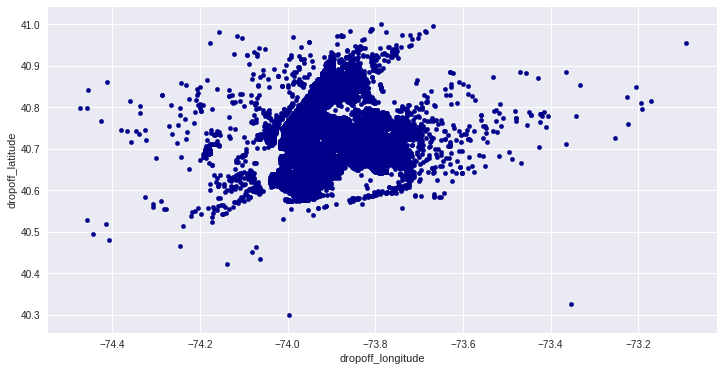

In [42]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html
data[(data['dropoff_longitude'] > -74.5) & 
     (data['dropoff_longitude'] < -73) & 
     (data['dropoff_latitude'] > 39) &
    (data['dropoff_latitude'] < 41) ].plot.scatter(
    x = 'dropoff_longitude',
    y = 'dropoff_latitude',
    c = 'DarkBlue', figsize = (12,6))


**Observations**
 - The majority of rides orginate and drop off at Manhattan as confirmed by online maps.

# Initial Model

In [9]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [10]:
vendor_id_dummies = pd.get_dummies(data.vendor_id)
vendor_id_dummies.head()

,1,2
583100,1,0
1320440,1,0
358078,0,1
1118733,0,1
110409,0,1


In [11]:
store_and_fwd_flag_dummies = pd.get_dummies(data.store_and_fwd_flag)
store_and_fwd_flag_dummies.head()

,N,Y
583100,1,0
1320440,1,0
358078,1,0
1118733,1,0
110409,1,0


In [12]:
data['vendor_id_1'] = vendor_id_dummies.iloc[:,0]
data['vendor_id_2'] = vendor_id_dummies.iloc[:,1]

data['store_and_fwd_flag_N'] = store_and_fwd_flag_dummies.iloc[:,0]
data['store_and_fwd_flag_Y'] = store_and_fwd_flag_dummies.iloc[:,1]

In [13]:
## Convert the categorical variables to be usable by regression
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.99,40.73,-73.97,40.78,N,2170,1,0,1,0
1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.98,40.76,-73.99,40.75,N,808,1,0,1,0
358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.78,40.64,-73.99,40.75,N,3787,0,1,1,0
1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.96,40.78,-73.98,40.74,N,679,0,1,1,0
110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.79,40.65,-73.95,40.81,N,2791,0,1,1,0


In [17]:
# Preparing the dataset for the initial model
## Remove id as it is unique for each row: no correlational patterns for model predictions.
## Remove variations of trip_duration and keeping the trip_duration_hr for prediction
## Dropoff variables are not available to predict trip_duration as input data, 
#### but approx. of longitude and latitude might be available ahead of time.
#### This information is not available at that time.
## Remove 'pickup_datetime' in the initial model as further feature engineering 
#### will be done later.

input_variables = ['pickup_longitude', 'pickup_latitude',
          'dropoff_longitude', 'dropoff_latitude',
          'vendor_id_1', 'vendor_id_2',
          'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
          'passenger_count']

y = data.trip_duration_hr

X = data[input_variables].values

In [18]:
# Doc: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
import sklearn
print(sklearn.__version__)

0.18.1


In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [22]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(525081, 9)
(525081,)

(58343, 9)
(58343,)


In [24]:
# Doc: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
from sklearn.linear_model import LinearRegression

In [25]:
regression = LinearRegression()

In [26]:
# Train the model using the training sets
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# The coefficients
print("Variables names: \n", input_variables) 
print('Coefficients: \n', regression.coef_)

Variables names: 
 ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'passenger_count']
Coefficients: 
 [ 0.43900753 -1.08816589 -0.16662854 -0.44334594 -0.03077885  0.03077885
 -0.02889636  0.02889636  0.00193984]


# Evaluation

In [28]:
# Doc: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [29]:
# Doc: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
scores = cross_val_score(regression, X_train, y_train, 
                        cv=10,
                        scoring='r2')
print("Mean R2 on 10-CV: " + str(np.mean(scores))) 
scores = cross_val_score(regression, X_train, y_train, 
                        cv=10,
                        scoring='neg_mean_squared_error')
print("Mean MSE on 10-CV: " + str(np.mean(scores)))

Mean R2 on 10-CV: 0.00413170870269
Mean MSE on 10-CV: -0.763266841046


In [30]:
# Train data predictions
train_y_pred = regression.predict(X_train)

In [31]:
# Testing data predictions
test_y_pred = regression.predict(X_test)

In [32]:
# Evaluation on training data
print("Mean squared error: %.4f"
      % mean_squared_error(y_train, train_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_train, train_y_pred))

Mean squared error: 0.7628
Variance score: 0.0048


In [33]:
# Evaluation on testing data
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, test_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_test, test_y_pred))

Mean squared error: 0.8879
Variance score: 0.0044


# Feature Engineering

In [34]:
# Just latitude and longitude in the model might not be useful
## Based on the data exploration
## New feature highlights Manhattan as the pickup and dropoff location
### Only travel within Manhattan
def travel_within_manhattan(row):
    if  40.70 < row['dropoff_latitude'] < 40.87 and \
    -74.05 < row['dropoff_longitude'] < -73.94 and \
    40.70 < row['pickup_latitude'] < 40.87 and \
    -74.05 < row['pickup_longitude'] < -73.94:
        return 1
    else:
        return 0
    
data['within_manhattan'] = data.apply(travel_within_manhattan, axis = 1)

In [35]:
# Get datetime features - hour, weekday, month
data['pickup_hour'] = data.pickup_datetime.dt.hour
data['pickup_week'] = data.pickup_datetime.dt.weekday
data['pickup_month'] = data.pickup_datetime.dt.month

In [36]:
# Get whether the day is a weekend or not
def is_weekend(row):
    if row['pickup_week'] in [4,5,6]:
        return 1
    else:
        return 0

# Get the specific time of day category instead of individual hours, which might be less meaningful
def hour_category(row):
    if row['pickup_hour'] in [1, 2, 3, 4, 5]:
        return 'late_night'
    elif row['pickup_hour'] in [21, 22, 23, 24]:
        return 'night'
    elif row['pickup_hour'] in [17, 18, 19, 20]:
        return 'evening'
    elif row['pickup_hour'] in [12, 13, 14, 15, 16]:
        return 'afternoon'
    elif row['pickup_hour'] in [6, 7, 8, 9, 10, 11]:
        return 'morning'

In [37]:
data['pickup_hour_cat'] = data.apply(hour_category, axis=1)
data['pickup_is_weekend'] = data.apply(is_weekend, axis=1)

In [38]:
pickup_hour_cat_dummies = pd.get_dummies(data.pickup_hour_cat)
pickup_hour_cat_dummies.head()

,afternoon,evening,late_night,morning,night
583100,0,1,0,0,0
1320440,0,0,0,1,0
358078,0,1,0,0,0
1118733,0,0,0,1,0
110409,0,1,0,0,0


In [39]:
data['pickup_hour_cat_afternoon'] = pickup_hour_cat_dummies.iloc[:,0]
data['pickup_hour_cat_evening'] = pickup_hour_cat_dummies.iloc[:,1]
data['pickup_hour_cat_late_night'] = pickup_hour_cat_dummies.iloc[:,2]
data['pickup_hour_cat_morning'] = pickup_hour_cat_dummies.iloc[:,3]
data['pickup_hour_cat_night'] = pickup_hour_cat_dummies.iloc[:,4]

In [40]:
pd.options.display.max_columns = 50
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y,trip_duration_min,trip_duration_hr,trip_duration_hr_round,within_manhattan,pickup_hour,pickup_week,pickup_month,pickup_hour_cat,pickup_is_weekend,pickup_hour_cat_afternoon,pickup_hour_cat_evening,pickup_hour_cat_late_night,pickup_hour_cat_morning,pickup_hour_cat_night
583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.99,40.73,-73.97,40.78,N,2170,1,0,1,0,36.17,0.60,1.00,1,17,3,6,evening,0,0,1,0,0,0
1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.98,40.76,-73.99,40.75,N,808,1,0,1,0,13.47,0.22,0.00,1,10,2,3,morning,0,0,0,0,1,0
358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.78,40.64,-73.99,40.75,N,3787,0,1,1,0,63.12,1.05,1.00,0,17,2,2,evening,0,0,1,0,0,0
1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.96,40.78,-73.98,40.74,N,679,0,1,1,0,11.32,0.19,0.00,1,7,3,3,morning,0,0,0,0,1,0
110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.79,40.65,-73.95,40.81,N,2791,0,1,1,0,46.52,0.78,1.00,0,17,2,4,evening,0,0,1,0,0,0


# Model 2

In [41]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'trip_duration_min', 'trip_duration_hr',
       'trip_duration_hr_round', 'within_manhattan', 'pickup_hour',
       'pickup_week', 'pickup_month', 'pickup_hour_cat', 'pickup_is_weekend',
       'pickup_hour_cat_afternoon', 'pickup_hour_cat_evening',
       'pickup_hour_cat_late_night', 'pickup_hour_cat_morning',
       'pickup_hour_cat_night'],
      dtype='object')

In [42]:
# Add the newly added features

input_variables = ['pickup_longitude', 'pickup_latitude',
                   'dropoff_longitude', 'dropoff_latitude',
                   'vendor_id_1', 'vendor_id_2',
                   'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
                   'within_manhattan', 'pickup_is_weekend',
                   'pickup_hour_cat_afternoon',
                   'pickup_hour_cat_evening', 
                   'pickup_hour_cat_late_night',
                   'pickup_hour_cat_morning', 
                   'pickup_hour_cat_night',
                   'passenger_count']

y = data.trip_duration_hr

X = data[input_variables].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    test_size=0.10, 
                                                    random_state=42)

In [44]:
# Doc: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
from sklearn.linear_model import LinearRegression

In [45]:
regression = LinearRegression()

In [46]:
# Train the model using the training sets
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
# The coefficients
print("Variables names: \n", input_variables )
print('Coefficients: \n', regression.coef_)

Variables names: 
 ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'within_manhattan', 'pickup_is_weekend', 'pickup_hour_cat_afternoon', 'pickup_hour_cat_evening', 'pickup_hour_cat_late_night', 'pickup_hour_cat_morning', 'pickup_hour_cat_night', 'passenger_count']
Coefficients: 
 [ 0.23665564 -0.67161887 -0.16473236 -0.11202201 -0.02986939  0.02986939
 -0.01471312  0.01471312 -0.25496928 -0.00864628  0.08655021  0.05188896
 -0.00103421  0.044298    0.03445019  0.00191655]


# Evaluation

In [48]:
# Doc: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Doc: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
scores = cross_val_score(regression, X_train, y_train, 
                        cv=10,
                        scoring='r2')
print("Mean R2 on 10-CV: " + str(np.mean(scores)))
scores = cross_val_score(regression, X_train, y_train, 
                        cv=10,
                        scoring='neg_mean_squared_error')
print("Mean MSE on 10-CV: " + str(np.mean(scores)))

Mean R2 on 10-CV: 0.0150469459826
Mean MSE on 10-CV: -0.755069797778


In [50]:
# Train data predictions
train_y_pred = regression.predict(X_train)
# Testing data predictions
test_y_pred = regression.predict(X_test)

In [51]:
# Evaluation on training data
print("Mean squared error: %.5f"
      % mean_squared_error(y_train, train_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_train, train_y_pred))

Mean squared error: 0.75500
Variance score: 0.01494


In [52]:
# Evaluation on testing data
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, test_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, test_y_pred))

Mean squared error: 0.88024
Variance score: 0.01306


**Observations**
 - Improvement in MSE and R^2 with the new features.

# Further Investigation/Exploration

In [53]:
# Try different models - Lasso regression
## http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
print(input_variables)
print(lasso.coef_)

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'within_manhattan', 'pickup_is_weekend', 'pickup_hour_cat_afternoon', 'pickup_hour_cat_evening', 'pickup_hour_cat_late_night', 'pickup_hour_cat_morning', 'pickup_hour_cat_night', 'passenger_count']
[ 0. -0.  0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0.]


In [55]:
scores = cross_val_score(lasso, X_train, y_train, 
                        cv=10,
                        scoring='r2')
print("Mean R2 on 10-CV: " + str(np.mean(scores)))
scores = cross_val_score(lasso, X_train, y_train,
                        cv=10,
                        scoring='neg_mean_squared_error')
print("Mean MSE on 10-CV: " + str(np.mean(scores)))

Mean R2 on 10-CV: -3.05395162663e-05
Mean MSE on 10-CV: -0.766457154208


In [56]:
# Try different models - Ridge regression
## http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
print(input_variables)
print(ridge.coef_)

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'within_manhattan', 'pickup_is_weekend', 'pickup_hour_cat_afternoon', 'pickup_hour_cat_evening', 'pickup_hour_cat_late_night', 'pickup_hour_cat_morning', 'pickup_hour_cat_night', 'passenger_count']
[ 0.23640239 -0.66996305 -0.16453957 -0.11255872 -0.02986918  0.02986918
 -0.01471193  0.01471193 -0.25499008 -0.00864559  0.08653044  0.0518719
 -0.0010475   0.04427677  0.03443682  0.00191675]


In [58]:
scores = cross_val_score(ridge, X_train, y_train, 
                        cv=10,
                        scoring='r2')
print("Mean R2 on 10-CV: " + str(np.mean(scores)))
scores = cross_val_score(ridge, X_train, y_train, 
                        cv=10,
                        scoring='neg_mean_squared_error')
print("Mean MSE on 10-CV: " + str(np.mean(scores)))

Mean R2 on 10-CV: 0.0150470902956
Mean MSE on 10-CV: -0.755069676091


In [ ]:
# Model Tuning

In [59]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [1,0.1,0.01,0.001,0.0001,0, 0.5], 
          'normalize' : [True, False]}
grid = GridSearchCV(estimator=ridge, param_grid=params)
grid.fit(X_train, y_train)
print(grid)

/home/skye/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.053278848767349e-33
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/skye/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7212069784482325e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/skye/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.3977796332825424e-32
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/skye/.local/share/canopy/edm/envs/User/li

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)


In [60]:
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

0.0148758502012
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [61]:
# Train data predictions
train_y_pred = ridge.predict(X_train)
# Testing data predictions
test_y_pred = ridge.predict(X_test)

In [62]:
# Evaluation on training data
print("Mean squared error: %.5f"
      % mean_squared_error(y_train, train_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_train, train_y_pred))

Mean squared error: 0.75500
Variance score: 0.01494


In [63]:
# Evaluation on testing data
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, test_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, test_y_pred))

Mean squared error: 0.88024
Variance score: 0.01306


**Observations**
 - No improvement via lasso and ridge regression.
 - Ridge regression with the parameter tuning for the alpha and normalize parameter of the ridge regression. 

In [65]:
# Try different models - Random Forest regressor(ensemble model)
## http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, random_state=0,
                           n_estimators=100)

In [66]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [68]:
print(input_variables)
print(rf.feature_importances_)

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'within_manhattan', 'pickup_is_weekend', 'pickup_hour_cat_afternoon', 'pickup_hour_cat_evening', 'pickup_hour_cat_late_night', 'pickup_hour_cat_morning', 'pickup_hour_cat_night', 'passenger_count']
[ 0.08409957  0.1455429   0.18298747  0.11630002  0.0268468   0.00785499
  0.          0.          0.41142846  0.00231043  0.00984969  0.00198761
  0.00160476  0.00116347  0.00070072  0.00732311]


In [69]:
# Train data predictions
train_y_pred = rf.predict(X_train)
# Testing data predictions
test_y_pred = rf.predict(X_test)

In [70]:
# Evaluation on training data
print("Mean squared error: %.5f"
      % mean_squared_error(y_train, train_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_train, train_y_pred))

Mean squared error: 0.74497
Variance score: 0.02803


In [71]:
# Evaluation on testing data
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, test_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, test_y_pred))

Mean squared error: 0.87550
Variance score: 0.01838


**Observations**
 - Improvement in MSE and R^2 via the Random Forest regressor.

**Suggestions**
 - Add more features based on datasets that might be related: weather data for that particular day (i.e., temperature, humidity, weather condition)
 - Engineer more location features based on latitude and longitude.
 - Add more passenger count bins.
 - Use another regressor type.